In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import concatenate
sc = MinMaxScaler(feature_range = (0,1))

import pandas as pd

In [21]:
df1 = pd.read_csv('AI_U16_ONU16_15S_Gi-1.csv', usecols=[0], engine='python')
df1.head()

,Gi-1
0,56923
1,58620
2,60624
3,43173
4,39962


In [22]:
df2 = pd.read_csv('AI_U16_ONU16_15S_Ai.csv', usecols=[0], engine='python')
df2.head()

,Ai
0,58620
1,60624
2,43173
3,39962
4,71209


In [23]:
df1 = df1.values
df1 = df1.astype('float32')

df2 = df2.values
df2 = df2.astype('float32')

In [24]:
#df2 = []

#for i in range(len(df)):
#    if(df[i] > 195000.0):
#        df[i] = 195000.0
#    df2.append(df[i])

In [25]:
#df = df2
df1 = df1[:1000]
df2 = df2[:1000]
print(len(df1))
print(len(df2))

1000
1000


In [26]:
# normalize the dataset
#scaler = MinMaxScaler(feature_range=(0, 1))
#datasetG = scaler.fit_transform(df1)
#datasetA = scaler.fit_transform(df2)
datasetG = df1
datasetA = df2

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [28]:
# split into train and test sets
train_sizeG = int(len(datasetG) * 0.7) 
test_sizeG = len(datasetG) - train_sizeG
trainG, testG = datasetG[0:train_sizeG], datasetG[train_sizeG:len(datasetG)]

trainG = scaler.fit_transform(trainG)
testG = scaler.fit_transform(testG)
print(len(trainG), len(testG))

700 300


In [29]:
# split into train and test sets
train_sizeA = int(len(datasetA) * 0.7) 
test_sizeA = len(datasetA) - train_sizeA
trainA, testA = datasetA[0:train_sizeA], datasetA[train_sizeA:len(datasetA)]

#scaler = MinMaxScaler(feature_range=(0, 1))
trainA = scaler.fit_transform(trainA)
testA = scaler.fit_transform(testA)
print(len(trainA), len(testA))

700 300


In [30]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [48]:
#固定time steps = 10, feature = 1
#look_back = 10, 20, 30, 40, 50
# reshape into X=t and Y=t+1
look_back = 20 #
trainX_G, trainY_G = create_dataset(trainG, look_back)
testX_G, testY_G = create_dataset(testG, look_back)

trainX_A, trainY_A = create_dataset(trainA, look_back)
testX_A, testY_A = create_dataset(testA, look_back)

print(trainX_G.shape)

(679, 20, 1)


In [51]:
# reshape input to be [samples, time steps, features]
trainX_G = np.reshape(trainX_G, (trainX_G.shape[0] * 2, 10, 1))
testX_G = np.reshape(testX_G, (testX_G.shape[0] * 2, 10, 1))

trainX_A = np.reshape(trainX_A, (trainX_A.shape[0] * 2, 10, 1))
testX_A = np.reshape(testX_A, (testX_A.shape[0] * 2, 10, 1))

#trainX_G = np.reshape(trainX_G, (trainX_G.shape[0], look_back, 1))
#testX_G = np.reshape(testX_G, (testX_G.shape[0], look_back, 1))

#trainX_A = np.reshape(trainX_A, (trainX_A.shape[0], look_back, 1))
#testX_A = np.reshape(testX_A, (testX_A.shape[0], look_back, 1))
#print(trainX.shape[1])
print(trainX_G.shape)
print(trainY_G.shape)
print(testX_G.shape)
print(testY_G.shape)

print(trainX_A.shape)
print(trainY_A.shape)
print(testX_A.shape)
print(testY_A.shape)

(1358, 10, 1)
(679, 1)
(558, 10, 1)
(279, 1)
(1358, 10, 1)
(679, 1)
(558, 10, 1)
(279, 1)


In [45]:
#inputsR = Input(shape=(timesteps,))
inputs_A = Input(shape=(look_back,))
inputs_G = Input(shape=(look_back,))
#inputs = LayerNormalization(axis=1)(inputs)
#inputs_R_test = Reshape((inputs_R.shape[1],1))(inputs_R)
inputs_A_test = Reshape((inputs_A.shape[1], 1))(inputs_A)
inputs_G_test = Reshape((inputs_G.shape[1], 1))(inputs_G)

input_merge = concatenate([inputs_A_test,inputs_G_test], axis = -1)

tgt1 = Reshape((look_back, 2))(input_merge)

#tf.print(tgt1, output_stream=sys.stderr)

In [46]:
#tgt1 = LSTM(units=40, input_shape=(look_back, 2))(tgt1)
#predictions = Dense(1, activation='relu')(tgt1)

tgt1 = LSTM(units=40, return_sequences = True, input_shape=(look_back, 2))(tgt1)
tgt1 = Dropout(0.2)(tgt1)

tgt2 = LSTM(units=40, return_sequences = True)(tgt1)
tgt2 = Dropout(0.2)(tgt2)

tgt3 = LSTM(units=40, return_sequences = True)(tgt2)
tgt3 = Dropout(0.2)(tgt3)

#tgt4 = LSTM(units=40, return_sequences = True)(tgt3)
#tgt4 = Dropout(0.2)(tgt4)

#tgt5 = LSTM(units=40, return_sequences = True)(tgt4)
#tgt5 = Dropout(0.2)(tgt5)

#tgt6 = LSTM(units=20)(tgt5)
#tgt6 = Dropout(0.2)(tgt6)

#tgt7 = LSTM(units=20, return_sequences = True)(tgt6)
#tgt7 = Dropout(0.2)(tgt7)

#tgt8 = LSTM(units=20, return_sequences = True)(tgt7)
#tgt8 = Dropout(0.2)(tgt8)

#tgt9 = LSTM(units=20, return_sequences = True)(tgt8)
#tgt9 = Dropout(0.2)(tgt9)

tgt4 = LSTM(units=40)(tgt3)
tgt4 = Dropout(0.2)(tgt4)

#tgt6 = LSTM(units=40, return_sequences = True)(tgt5)

#tgt7 = LSTM(units=40)(tgt6)


#tgt5 = Flatten()(tgt5)
#predictions = Dense(1, activation='relu')(tgt4)
predictions = Dense(1)(tgt4)


model = Model(inputs=[inputs_A, inputs_G], outputs=predictions)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse','mae'])

history = model.fit([trainX_A, trainX_G], trainY_A, epochs=100, batch_size=32) #[1,0,0], [0,0,1]

ValueError: Data cardinality is ambiguous:
  x sizes: 1358, 1358
  y sizes: 679
Please provide data which shares the same first dimension.

look back = timesteps = 10, 4 LSTM layers

timesteps :  10


Text(0.5, 1.0, 'mae')

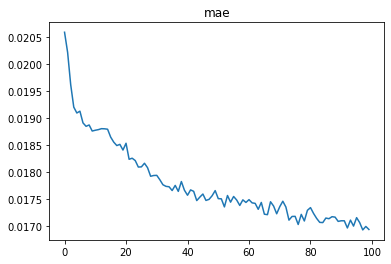

In [16]:
print('timesteps : ', look_back)
plt.plot(history.history['mae'])
plt.title('mae')

timesteps :  10


Text(0.5, 1.0, 'mse')

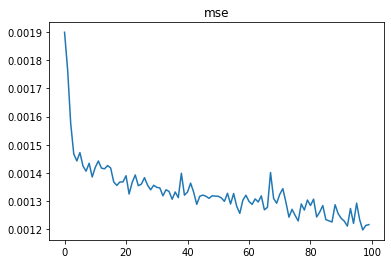

In [17]:
print('timesteps : ', look_back)
plt.plot(history.history['mse'])
plt.title('mse')

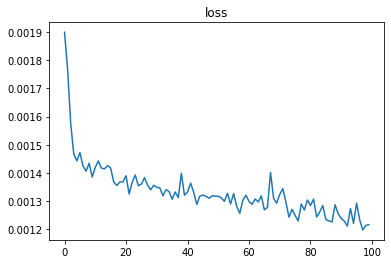

In [18]:
plt.title('loss')
plt.plot(history.history['loss'])

In [19]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 10, 1)        0           input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 10, 1)        0           input_2[0][0]                    
_______________________________________________________________________________________

In [20]:
from sklearn.metrics import mean_squared_error as mse

trainPredict = model.predict([trainX_A, trainX_G])
testPredict = model.predict([testX_A, testX_G])

In [21]:
# invert predictions
#scaler = MinMaxScaler(feature_range=(0, 1))
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY_A)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY_A)
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY, trainPredict))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY, testPredict))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 21157.51 RMSE
Test Score: 19533.03 RMSE
Train Score: 100.79 RMAE
Test Score: 97.23 RMAE


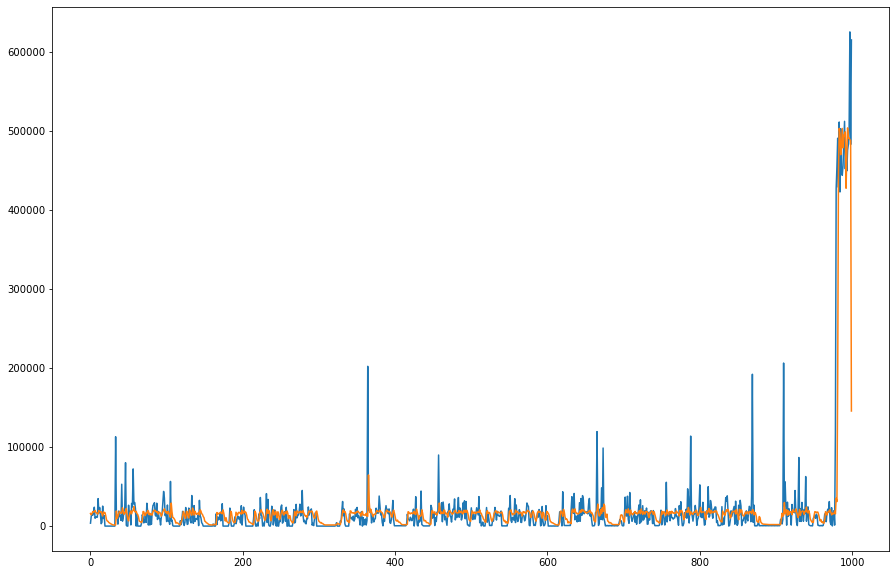

In [24]:
testPredictPlot = np.empty_like(datasetA)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(datasetA)-1] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 10))
#plt.plot(datasetA[1500:])
plt.plot(datasetA[34000:35000])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[34000:35000])
plt.show()

In [ ]:
testPredictPlot = np.empty_like(datasetA)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(datasetA)-1] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 10))
#plt.plot(datasetA[1500:])
plt.plot(datasetA[14000:15000])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[14000:15000])
plt.show()

In [25]:
max(testPredict)

array([565743.75], dtype=float32)

In [26]:
#testPredict

In [27]:
#testY_A

In [28]:
#datasetA[:100]

In [29]:
model.save('U16D00_ONU16_AiGi-1_1401388_195000_4layer_lookback.h5', include_optimizer=False)